In [1]:
# importing the zipfile module 
from zipfile import ZipFile 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium import plugins
import pandas as pd
import numpy as np
import scipy.stats as stats

import datetime

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import datetime
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, precision_score, recall_score, roc_auc_score, roc_curve

import warnings
warnings.filterwarnings('ignore')

In [144]:
pip install folium

  Using cached folium-0.15.1-py2.py3-none-any.whl (97 kB)
  Using cached xyzservices-2023.10.1-py3-none-any.whl (56 kB)
  Using cached branca-0.7.0-py3-none-any.whl (25 kB)
Note: you may need to restart the kernel to use updated packages.


In [2]:
with ZipFile("crime.zip", 'r') as file: 
  
    # Extracting all the members of the zip  
    # into a specific location. 
    file.extractall() 

In [2]:
df = pd.read_csv('Crime_Data_from_2020_to_Present.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 802956 entries, 0 to 802955
Data columns (total 28 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DR_NO           802956 non-null  int64  
 1   Date Rptd       802956 non-null  object 
 2   DATE OCC        802956 non-null  object 
 3   TIME OCC        802956 non-null  int64  
 4   AREA            802956 non-null  int64  
 5   AREA NAME       802956 non-null  object 
 6   Rpt Dist No     802956 non-null  int64  
 7   Part 1-2        802956 non-null  int64  
 8   Crm Cd          802956 non-null  int64  
 9   Crm Cd Desc     802956 non-null  object 
 10  Mocodes         692304 non-null  object 
 11  Vict Age        802956 non-null  int64  
 12  Vict Sex        697683 non-null  object 
 13  Vict Descent    697675 non-null  object 
 14  Premis Cd       802947 non-null  float64
 15  Premis Desc     802481 non-null  object 
 16  Weapon Used Cd  279525 non-null  float64
 17  Weapon Des

In [4]:
df.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,10304468,01/08/2020 12:00:00 AM,01/08/2020 12:00:00 AM,2230,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,...,AO,Adult Other,624.0,NaN,NaN,NaN,1100 W 39TH PL,NaN,34.0141,-118.2978
1,190101086,01/02/2020 12:00:00 AM,01/01/2020 12:00:00 AM,330,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,...,IC,Invest Cont,624.0,NaN,NaN,NaN,700 S HILL ST,NaN,34.0459,-118.2545
2,200110444,04/14/2020 12:00:00 AM,02/13/2020 12:00:00 AM,1200,1,Central,155,2,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,...,AA,Adult Arrest,845.0,NaN,NaN,NaN,200 E 6TH ST,NaN,34.0448,-118.2474
3,191501505,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,1730,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,IC,Invest Cont,745.0,998.0,NaN,NaN,5400 CORTEEN PL,NaN,34.1685,-118.4019
4,191921269,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,415,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,IC,Invest Cont,740.0,NaN,NaN,NaN,14400 TITUS ST,NaN,34.2198,-118.4468


In [3]:
df.columns

Index(['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA', 'AREA NAME',
       'Rpt Dist No', 'Part 1-2', 'Crm Cd', 'Crm Cd Desc', 'Mocodes',
       'Vict Age', 'Vict Sex', 'Vict Descent', 'Premis Cd', 'Premis Desc',
       'Weapon Used Cd', 'Weapon Desc', 'Status', 'Status Desc', 'Crm Cd 1',
       'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'LOCATION', 'Cross Street', 'LAT',
       'LON'],
      dtype='object')

In [7]:
df['Crm Cd Desc'].value_counts().head(5)

VEHICLE - STOLEN                                           85807
BATTERY - SIMPLE ASSAULT                                   63848
THEFT OF IDENTITY                                          51144
BURGLARY FROM VEHICLE                                      49330
VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)    49055
Name: Crm Cd Desc, dtype: int64

## Data Cleaning

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 802956 entries, 0 to 802955
Data columns (total 28 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DR_NO           802956 non-null  int64  
 1   Date Rptd       802956 non-null  object 
 2   DATE OCC        802956 non-null  object 
 3   TIME OCC        802956 non-null  int64  
 4   AREA            802956 non-null  int64  
 5   AREA NAME       802956 non-null  object 
 6   Rpt Dist No     802956 non-null  int64  
 7   Part 1-2        802956 non-null  int64  
 8   Crm Cd          802956 non-null  int64  
 9   Crm Cd Desc     802956 non-null  object 
 10  Mocodes         692304 non-null  object 
 11  Vict Age        802956 non-null  int64  
 12  Vict Sex        697683 non-null  object 
 13  Vict Descent    697675 non-null  object 
 14  Premis Cd       802947 non-null  float64
 15  Premis Desc     802481 non-null  object 
 16  Weapon Used Cd  279525 non-null  float64
 17  Weapon Des

In [10]:
df.isnull().sum()

DR_NO                  0
Date Rptd              0
DATE OCC               0
TIME OCC               0
AREA                   0
AREA NAME              0
Rpt Dist No            0
Part 1-2               0
Crm Cd                 0
Crm Cd Desc            0
Mocodes           110652
Vict Age               0
Vict Sex          105273
Vict Descent      105281
Premis Cd              9
Premis Desc          475
Weapon Used Cd    523431
Weapon Desc       523431
Status                 0
Status Desc            0
Crm Cd 1              10
Crm Cd 2          743809
Crm Cd 3          800986
Crm Cd 4          802899
LOCATION               0
Cross Street      674434
LAT                    0
LON                    0
dtype: int64

In [11]:
df.duplicated().sum()

0

In [4]:
df['DATE OCC'] = pd.to_datetime(df['DATE OCC'])


# Convert 'Date' to datetime format
df['Date'] = pd.to_datetime(df['DATE OCC'])

# Extract year, month, and day into separate columns
df['Year'] = df['DATE OCC'].dt.year
df['Month'] = df['DATE OCC'].dt.month_name()
df['Day'] = df['DATE OCC'].dt.day
df['Day of Week'] = df['DATE OCC'].dt.day_of_week

# Drop the original 'Date' column
df = df.drop(['DATE OCC'], axis=1)


In [5]:
df['Hour'] = df['TIME OCC'].apply(lambda x: x//100)

In [6]:
df['Day of Week'].value_counts()

4    122506
5    117405
2    114048
0    113732
3    113244
6    112015
1    110006
Name: Day of Week, dtype: int64

### Exploratory Data Analysis

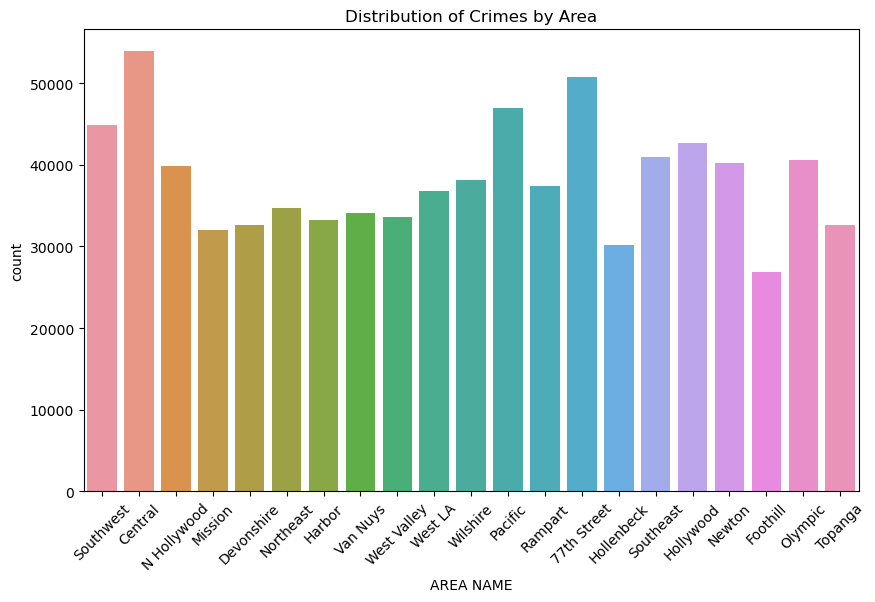

In [21]:
# Visualize the distribution of crimes by area
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='AREA NAME')
plt.title('Distribution of Crimes by Area')
plt.xticks(rotation=45)
plt.show()

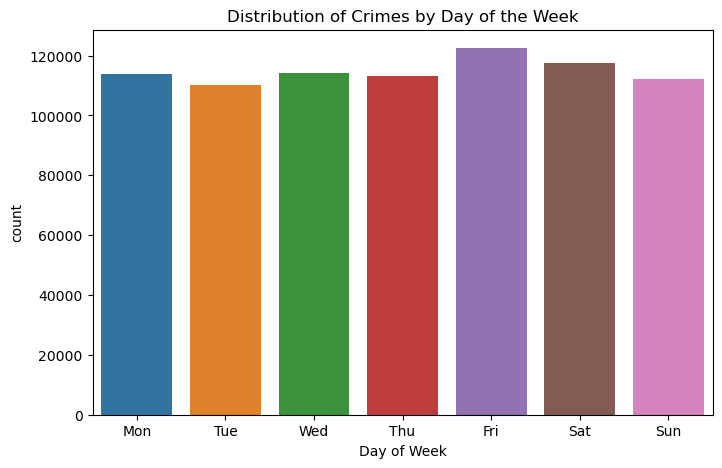

In [33]:
# Visualize the distribution of crimes by day of the week
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Day of Week')
plt.title('Distribution of Crimes by Day of the Week')
plt.xticks(ticks=range(7), labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.show()

In [45]:
df['Month'].value_counts()

July         75098
August       74263
May          73189
January      72972
June         72677
March        71100
April        70162
February     68567
September    62690
October      55984
December     53721
November     52533
Name: Month, dtype: int64

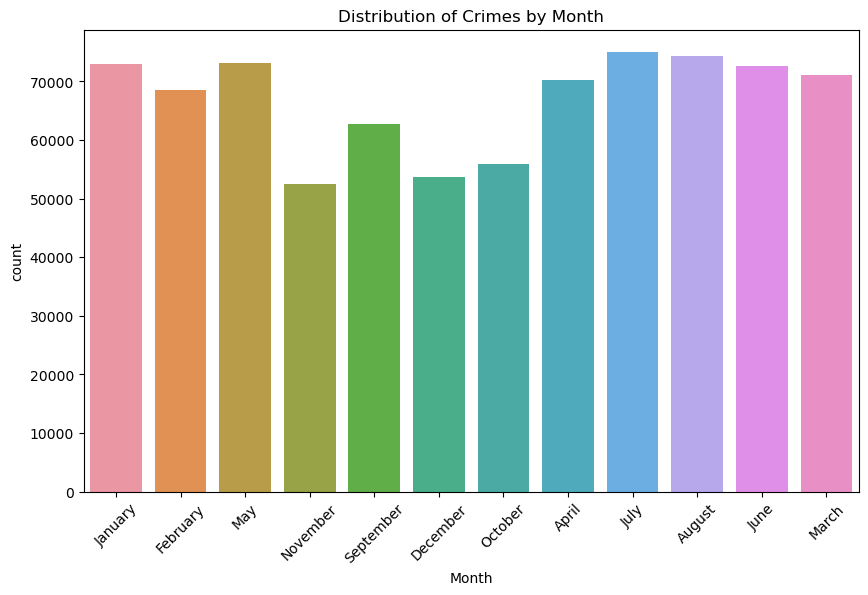

In [47]:
# Visualize the distribution of crimes by month
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Month')
plt.title('Distribution of Crimes by Month')
#plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12],['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.xticks(rotation=45)
plt.show()

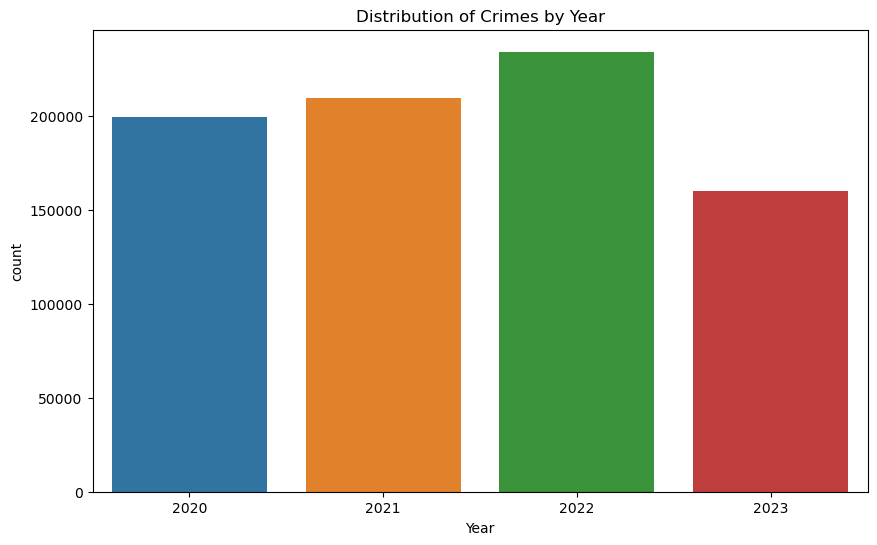

In [50]:
# Visualize the distribution of crimes by month
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Year')
plt.title('Distribution of Crimes by Year')
#plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12],['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
#plt.xticks(rotation=45)
plt.show()

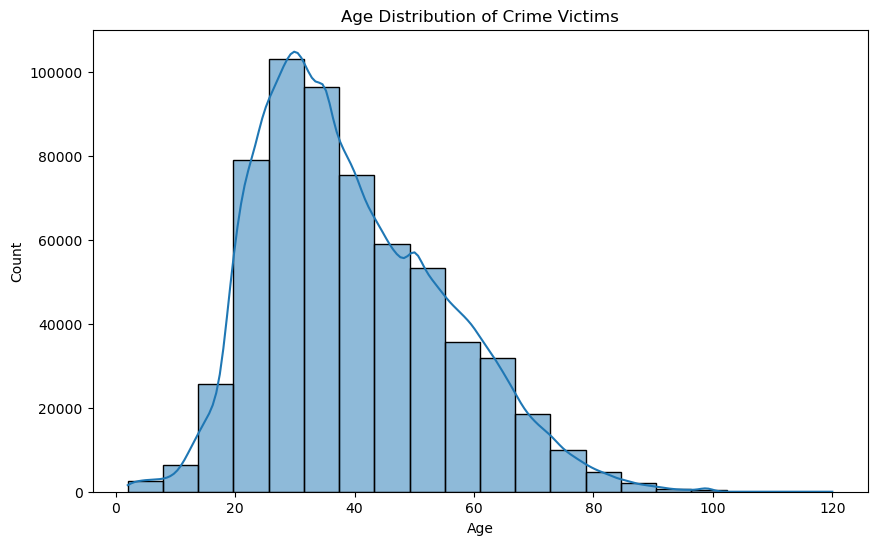

In [138]:
# Visualize the age distribution of victims
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Vict Age', bins=20, kde=True)
plt.title('Age Distribution of Crime Victims')
plt.xlabel('Age')
plt.show()

In [54]:
# # Explore the relationship between crime type and day/night crimes
# plt.figure(figsize=(10, 6))
# sns.countplot(data=df, x='IsDayTime', hue='CrimeType')
# plt.title('Distribution of Crime Types by Day/Night')
# plt.xlabel('Day/Night')
# plt.ylabel('Count')
# plt.legend(title='Crime Type')
# plt.xticks(ticks=[0, 1], labels=['Night', 'Day'])
# plt.show()

Text(0.5, 1.0, 'Number of Crime Incidents over 24 Hours in Top 5 Geographic Areas')

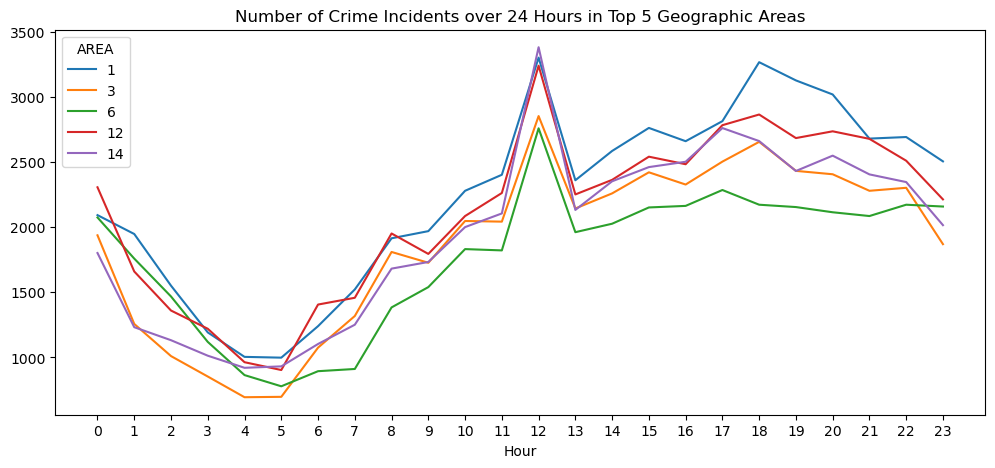

In [72]:
top5areas = df.groupby(['AREA'])['Day'].count().sort_values(ascending=False).index[:5]
data = df[df['AREA'].isin(top5areas)]
data.groupby(['Hour', 'AREA'])['Day'].count().unstack().plot(kind='line', figsize=(12, 5), xticks=range(0, 24))
plt.title('Number of Crime Incidents over 24 Hours in Top 5 Geographic Areas')

In [82]:
df['Month'][df['Year']==2023].value_counts()

January      19542
July         19410
August       18974
March        18951
April        18666
May          18607
June         18327
February     18230
September     9478
Name: Month, dtype: int64

In [84]:
def GetAgeCategory(age):
    if age<=4: return 'Baby'
    if age<=12: return 'Child'
    elif age<=19: return 'Teen'
    elif age<=39: return 'Adult'
    elif age<=59: return 'Middle'
    else: return 'Senior'
    
df['Vict Age Cat'] = df['Vict Age'].apply(lambda x: GetAgeCategory(x))

df.drop(df[(df['Year']==2023) & (df['Month']==6)].index, inplace=True) # data in 2023/6 is incomplete and thus removed
df.tail(5)

,DR_NO,Date Rptd,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,Mocodes,...,Cross Street,LAT,LON,Hour,Date,Year,Month,Day,Day of Week,Vict Age Cat
802951,231604807,01/27/2023 12:00:00 AM,1800,16,Foothill,1663,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",1300 0329,...,NaN,34.2466,-118.4054,18,2023-01-26,2023,January,26,3,Adult
802952,231606525,03/22/2023 12:00:00 AM,1000,16,Foothill,1602,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",0416 0411 1822,...,NaN,34.2790,-118.4116,10,2023-03-22,2023,March,22,2,Adult
802953,231210064,04/12/2023 12:00:00 AM,1630,12,77th Street,1239,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",0601 0445 0416 0359,...,NaN,33.9841,-118.2915,16,2023-04-12,2023,April,12,2,Adult
802954,230115220,07/02/2023 12:00:00 AM,1,1,Central,154,1,352,PICKPOCKET,1822 0344,...,NaN,34.0467,-118.2485,0,2023-07-01,2023,July,1,5,Adult
802955,230906458,03/05/2023 12:00:00 AM,900,9,Van Nuys,914,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),0329 1822,...,NaN,34.1951,-118.4487,9,2023-03-05,2023,March,5,6,Middle


Text(0.5, 1.0, 'Number of Crime Incidents over Victim Ages')

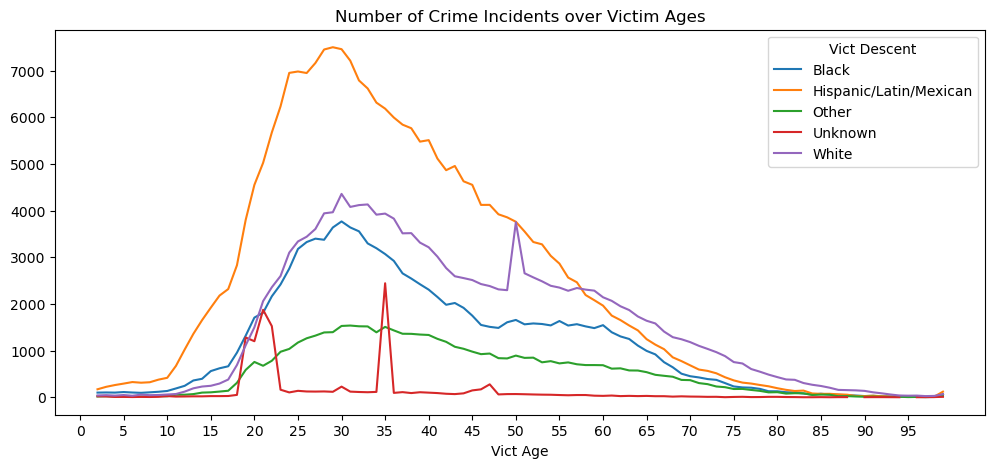

In [85]:
top5descents = df.groupby(['Vict Descent'])['Day'].count().sort_values(ascending=False).index[:5]
data = df[(df['Vict Age']>0) & (df['Vict Descent'].isin(top5descents))].copy()
vddict = {'B':'Black', 'H':'Hispanic/Latin/Mexican', 'O':'Other', 'W':'White', 'X':'Unknown'}
data['Vict Descent'] = data['Vict Descent'].apply(lambda x: vddict[x])

plt_data = data.groupby(['Vict Age', 'Vict Descent'])['Day'].count().unstack()
plt_data.plot(kind='line', figsize=(12, 5), xticks=range(0, 100, 5))
plt.title('Number of Crime Incidents over Victim Ages')

In [3]:
df['Vict Sex'].unique()

array(['F', 'M', 'X', nan, 'H', '-'], dtype=object)

In [4]:
df['Vict Sex'] = df['Vict Sex'][~(df['Vict Sex']=='-')]
df['Vict Sex'][(df['Vict Sex']=='H')] = 'Others'
df['Vict Sex'][(df['Vict Sex']=='X')] = 'Others'

In [5]:
df['Vict Sex'].unique()

array(['F', 'M', 'Others', nan], dtype=object)

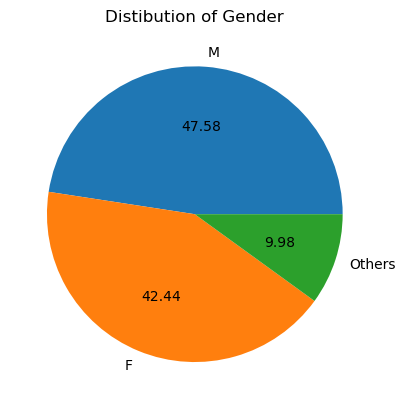

In [122]:
plt.pie(df['Vict Sex'].value_counts().values,labels=df['Vict Sex'].value_counts().index,
          autopct='%.2f')
plt.title('Distibution of Gender');

In [101]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
DR_NO,802956.0,2.158016e+08,1.071699e+07,817.0000,2.101176e+08,2.201057e+08,2.218191e+08,2.399165e+08
TIME OCC,802956.0,1.335403e+03,6.541646e+02,1.0000,9.000000e+02,1.415000e+03,1.900000e+03,2.359000e+03
AREA,802956.0,1.071574e+01,6.092093e+00,1.0000,6.000000e+00,1.100000e+01,1.600000e+01,2.100000e+01
Rpt Dist No,802956.0,1.117999e+03,6.091940e+02,101.0000,6.220000e+02,1.142000e+03,1.617000e+03,2.199000e+03
Part 1-2,802956.0,1.414290e+00,4.925994e-01,1.0000,1.000000e+00,1.000000e+00,2.000000e+00,2.000000e+00
Crm Cd,802956.0,5.007438e+02,2.078295e+02,110.0000,3.310000e+02,4.420000e+02,6.260000e+02,9.560000e+02
Vict Age,802956.0,2.984779e+01,2.176293e+01,-3.0000,9.000000e+00,3.100000e+01,4.500000e+01,1.200000e+02
Premis Cd,802947.0,3.057637e+02,2.165775e+02,101.0000,1.010000e+02,2.030000e+02,5.010000e+02,9.760000e+02
Weapon Used Cd,279525.0,3.628410e+02,1.237262e+02,101.0000,3.100000e+02,4.000000e+02,4.000000e+02,5.160000e+02
Crm Cd 1,802946.0,5.004817e+02,2.076182e+02,110.0000,3.310000e+02,4.420000e+02,6.260000e+02,9.560000e+02


In [137]:
df['Vict Age'].min()

2.0

In [6]:
def remove_neg(value):
    if value <= 0:
        return np.nan
    else:
        return value
    

In [7]:
df['Vict Age'] = df['Vict Age'].apply(remove_neg)

In [139]:
#set index
df = df.set_index(['DR_NO'])

In [140]:
df.head()

,Date Rptd,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,Mocodes,Vict Age,...,Cross Street,LAT,LON,Hour,Date,Year,Month,Day,Day of Week,Vict Age Cat
DR_NO,,,,,,,,,,,,,,,,,,,,,
10304468,01/08/2020 12:00:00 AM,2230,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,0444 0913,36.0,...,NaN,34.0141,-118.2978,22,2020-01-08,2020,January,8,2,Adult
190101086,01/02/2020 12:00:00 AM,330,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,0416 1822 1414,25.0,...,NaN,34.0459,-118.2545,3,2020-01-01,2020,January,1,2,Adult
200110444,04/14/2020 12:00:00 AM,1200,1,Central,155,2,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,1501,NaN,...,NaN,34.0448,-118.2474,12,2020-02-13,2020,February,13,3,Baby
191501505,01/01/2020 12:00:00 AM,1730,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),0329 1402,76.0,...,NaN,34.1685,-118.4019,17,2020-01-01,2020,January,1,2,Senior
191921269,01/01/2020 12:00:00 AM,415,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",0329,31.0,...,NaN,34.2198,-118.4468,4,2020-01-01,2020,January,1,2,Adult


In [141]:
#get the first 500 crimes in the df_incidents dataframe
limit = 500
df_incidents = df.iloc[0:limit, :]
df_incidents.shape

(500, 33)

In [146]:
#assign LA coordinates
la_longitude = -118.2426
la_latitude = 34.0549

#Define the world map centered around Los Angeles with a higher zoom level
la_map = folium.Map(location=[la_latitude, la_longitude], zoom_start=9)

#Display map
la_map

In [148]:
#Loop through the 500 crimes and add each to the incidents feature group
#Instantiate a feature group for the incidents in the dataframe
incidents = folium.map.FeatureGroup()
for lat, lng, in zip(df_incidents.LAT, df_incidents.LON):
    incidents.add_child(
        folium.vector_layers.CircleMarker(
            [lat, lng],
            radius=4.0,
            color='gray',
            fill=True,
            fill_color='orange',
            fill_opacity=1.0
        )
    )

#Add incidents to map
la_map.add_child(incidents)

Text(0.5, 1.0, 'Dsitribution of Crime by Status')

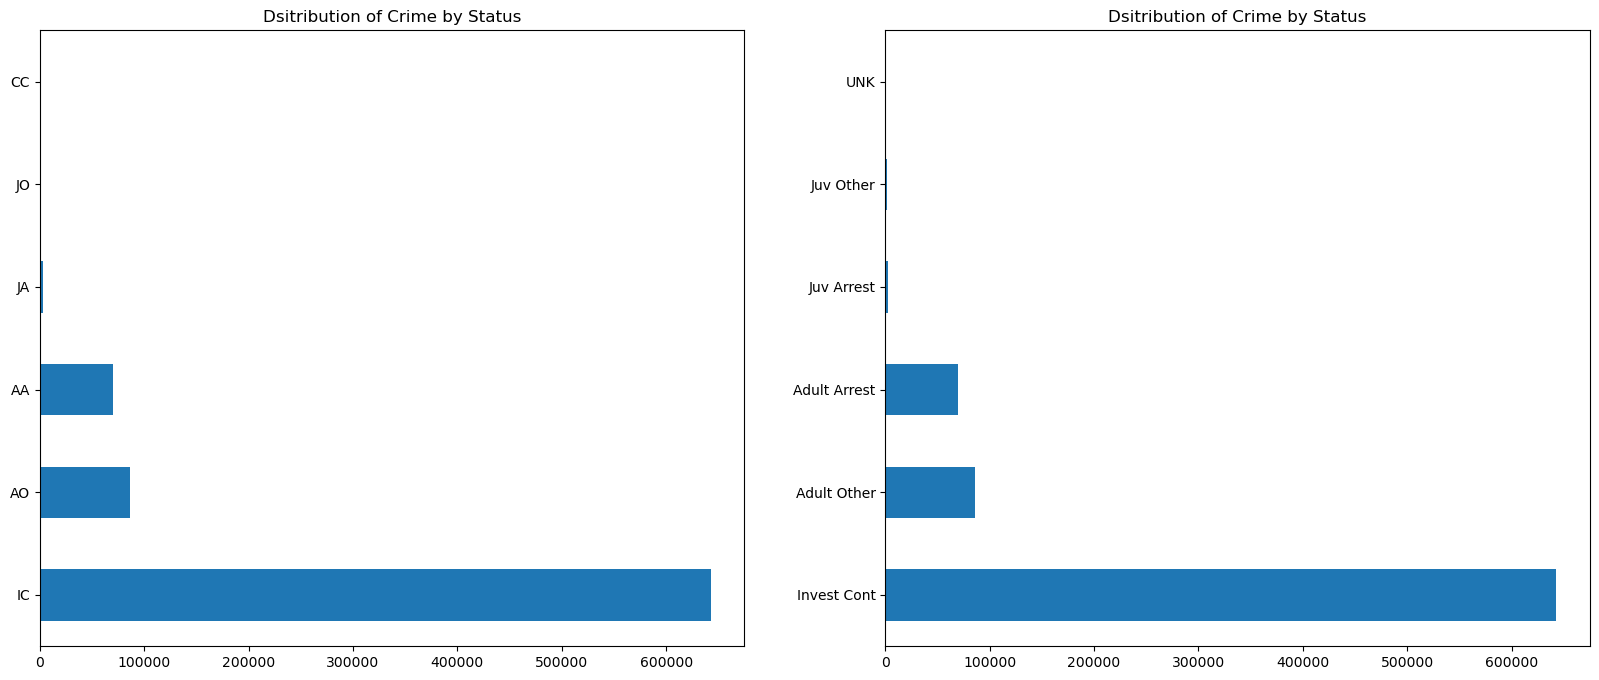

In [154]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
df['Status'].value_counts().plot.barh()
plt.title('Dsitribution of Crime by Status')
plt.subplot(1,2,2)
df['Status Desc'].value_counts().plot.barh()
plt.title('Dsitribution of Crime by Status')

Text(0.5, 1.0, 'Distribution of Weapon Used')

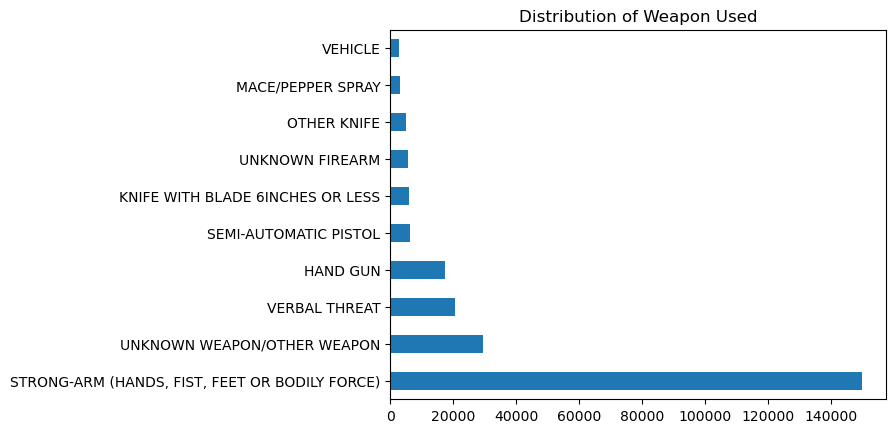

In [161]:

df['Weapon Desc'].value_counts().head(10).plot.barh()
plt.title('Distribution of Weapon Used')

Text(0.5, 1.0, 'Number of Crime Incidents over Geographic Areas')

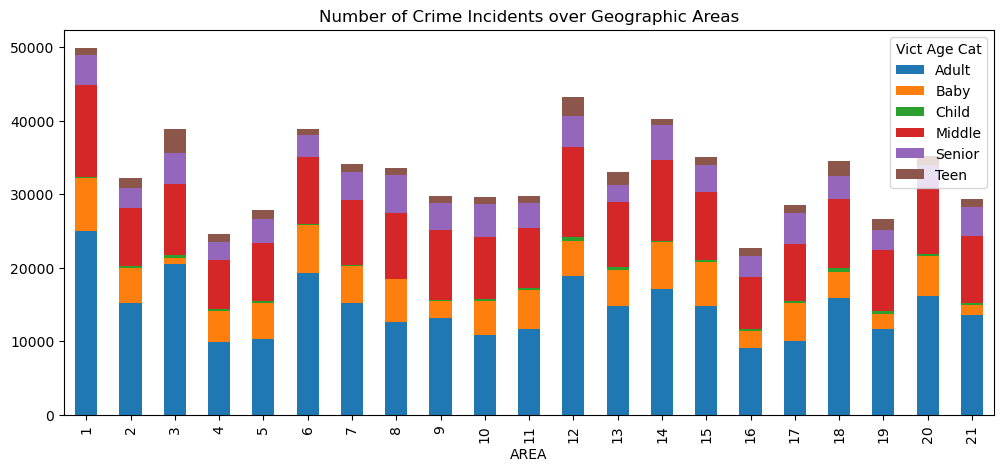

In [162]:
plt_data = df[df['Vict Descent'].notnull()].groupby(['AREA', 'Vict Age Cat'])['Day'].count().unstack()
plt_data.plot(kind='bar', stacked=True, figsize=(12, 5))
#plt_data.plot(kind='line', figsize=(12, 5), xticks=range(1, 22))
plt.title('Number of Crime Incidents over Geographic Areas')

In [13]:
df.columns

Index(['DR_NO', 'Date Rptd', 'TIME OCC', 'AREA', 'AREA NAME', 'Rpt Dist No',
       'Part 1-2', 'Crm Cd', 'Crm Cd Desc', 'Mocodes', 'Vict Age', 'Vict Sex',
       'Vict Descent', 'Premis Cd', 'Premis Desc', 'Weapon Used Cd',
       'Weapon Desc', 'Status', 'Status Desc', 'Crm Cd 1', 'Crm Cd 2',
       'Crm Cd 3', 'Crm Cd 4', 'LOCATION', 'Cross Street', 'LAT', 'LON',
       'Date', 'Year', 'Month', 'Day', 'Day of Week', 'Hour'],
      dtype='object')

In [28]:
df['Crm Cd Desc'].value_counts().head(10)

VEHICLE - STOLEN                                           85807
BATTERY - SIMPLE ASSAULT                                   63848
THEFT OF IDENTITY                                          51144
BURGLARY FROM VEHICLE                                      49330
VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)    49055
BURGLARY                                                   48859
ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT             46158
THEFT PLAIN - PETTY ($950 & UNDER)                         40887
INTIMATE PARTNER - SIMPLE ASSAULT                          40478
THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)            31052
Name: Crm Cd Desc, dtype: int64

In [27]:
df['Crm Cd Desc'][df['Crm Cd Desc'].str.contains('ASSAULT')].count()

169675

In [8]:
def crime(value):
    if 'ASSAULT' in value:
        return 'ASSAULT'
    elif 'THEFT' in value or 'STOLEN' in value:
        return 'Theft'
    elif 'VANDALISM' in value or 'BURGLARY' in value:
        return 'Vandalism'
    else:
        return 'Others'

In [9]:
df['Crime_type'] = df['Crm Cd Desc'].apply(crime)

In [10]:
df['Crime_type'].value_counts()

Theft        316159
Vandalism    172798
ASSAULT      169675
Others       144324
Name: Crime_type, dtype: int64

In [168]:
crime_type_mapping = {
    'BATTERY - SIMPLE ASSAULT': 'Assault',
    'ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT':'Assault',
    'RAPE, FORCIBLE': 'Sexual Assault',
    'THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)':'Theft',
    'THEFT OF IDENTITY': 'Theft',
    'THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND OVER)': 'Theft',
    'THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LIVESTK,PROD':'Theft'
    
    
    # Add more mappings for different crime types
}
df['CrimeType'] = df['Crm Cd Desc'].map(crime_type_mapping)

In [178]:
df['Crime_type'].value_counts()

Theft             137537
Assault           110006
Sexual Assault      3182
Name: CrimeType, dtype: int64

<AxesSubplot:ylabel='Crime_type'>

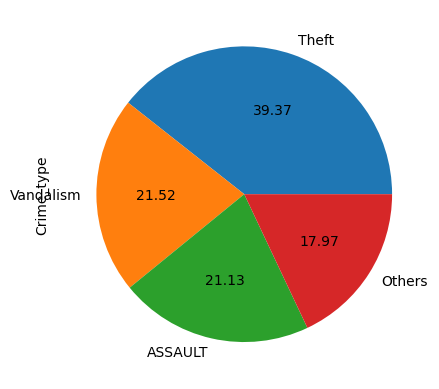

In [37]:
df['Crime_type'].value_counts().plot.pie(autopct='%.2f')

## Modeling

In [11]:
df.columns

Index(['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA', 'AREA NAME',
       'Rpt Dist No', 'Part 1-2', 'Crm Cd', 'Crm Cd Desc', 'Mocodes',
       'Vict Age', 'Vict Sex', 'Vict Descent', 'Premis Cd', 'Premis Desc',
       'Weapon Used Cd', 'Weapon Desc', 'Status', 'Status Desc', 'Crm Cd 1',
       'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'LOCATION', 'Cross Street', 'LAT',
       'LON', 'Crime_type'],
      dtype='object')

In [7]:
df.reset_index(inplace = True)

In [8]:
df['Vict Age'].min()

2.0

In [12]:
df_new = df.copy()

In [16]:
df_new = df.drop(['Date Rptd','TIME OCC','AREA NAME','Rpt Dist No',
         'Crm Cd Desc','Mocodes','Premis Desc','Weapon Desc',
         'Status','Crm Cd 1', 'Crm Cd 2','Crm Cd 3', 'Crm Cd 4',
         'LOCATION', 'Cross Street', 'LAT', 'LON','DR_NO'], axis=1)

In [14]:
df_new.head()

,index,DATE OCC,AREA,Part 1-2,Crm Cd,Vict Age,Vict Sex,Vict Descent,Premis Cd,Weapon Used Cd,Status Desc
0,0,01/08/2020 12:00:00 AM,3,2,624,36.0,F,B,501.0,400.0,Adult Other
1,1,01/01/2020 12:00:00 AM,1,2,624,25.0,M,H,102.0,500.0,Invest Cont
2,2,02/13/2020 12:00:00 AM,1,2,845,NaN,X,X,726.0,NaN,Adult Arrest
3,3,01/01/2020 12:00:00 AM,15,2,745,76.0,F,W,502.0,NaN,Invest Cont
4,4,01/01/2020 12:00:00 AM,19,2,740,31.0,X,X,409.0,NaN,Invest Cont


In [301]:
#df_model = df_new[(df_new['CrimeType']=='Assault') | (df_new['CrimeType']=='Theft')]

In [46]:
df_new['Crime_type'].value_counts()

Theft        316159
Vandalism    172798
ASSAULT      169675
Others       144324
Name: Crime_type, dtype: int64

In [49]:
df_new['Vict Descent'].value_counts().head(5)

H    246453
W    164007
B    114645
X     76912
O     63709
Name: Vict Descent, dtype: int64

In [17]:
df_model = df_new[(df_new['Vict Descent']=='H') | (df_new['Vict Descent']=='W') | (df_new['Vict Descent']=='B') | \
(df_new['Vict Descent']=='O') | (df_new['Vict Descent']=='X')]

In [16]:
df_model.head()

,index,DATE OCC,AREA,Part 1-2,Crm Cd,Vict Age,Vict Sex,Vict Descent,Premis Cd,Weapon Used Cd,Status Desc
0,0,01/08/2020 12:00:00 AM,3,2,624,36.0,F,B,501.0,400.0,Adult Other
1,1,01/01/2020 12:00:00 AM,1,2,624,25.0,M,H,102.0,500.0,Invest Cont
2,2,02/13/2020 12:00:00 AM,1,2,845,NaN,X,X,726.0,NaN,Adult Arrest
3,3,01/01/2020 12:00:00 AM,15,2,745,76.0,F,W,502.0,NaN,Invest Cont
4,4,01/01/2020 12:00:00 AM,19,2,740,31.0,X,X,409.0,NaN,Invest Cont


In [14]:
df['Crime_type'].value_counts()

Theft        316159
Vandalism    172798
ASSAULT      169675
Others       144324
Name: Crime_type, dtype: int64

In [18]:
## checking for mising
# count missing data
df_missing_count = df_model.isnull().sum().sort_values(ascending=False)
pd.DataFrame({'Percent Missing':df_missing_count/len(df_model)})

,Percent Missing
Weapon Used Cd,0.590300
Vict Age,0.137988
Vict Sex,0.000006
DATE OCC,0.000000
AREA,0.000000
Part 1-2,0.000000
Crm Cd,0.000000
Vict Descent,0.000000
Premis Cd,0.000000
Status Desc,0.000000


In [59]:
df_model.reset_index(inplace = True)

In [19]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 665726 entries, 0 to 802955
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE OCC        665726 non-null  object 
 1   AREA            665726 non-null  int64  
 2   Part 1-2        665726 non-null  int64  
 3   Crm Cd          665726 non-null  int64  
 4   Vict Age        573864 non-null  float64
 5   Vict Sex        665722 non-null  object 
 6   Vict Descent    665726 non-null  object 
 7   Premis Cd       665726 non-null  float64
 8   Weapon Used Cd  272748 non-null  float64
 9   Status Desc     665726 non-null  object 
 10  Crime_type      665726 non-null  object 
dtypes: float64(3), int64(3), object(5)
memory usage: 60.9+ MB


In [20]:
df_model = df_model.drop(['Weapon Used Cd','DATE OCC'], axis=1)

In [21]:
df_clean = df_model.dropna()

In [76]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 573860 entries, 0 to 665725
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   index         573860 non-null  int64  
 1   AREA          573860 non-null  int64  
 2   Part 1-2      573860 non-null  int64  
 3   Crm Cd        573860 non-null  int64  
 4   Vict Age      573860 non-null  float64
 5   Vict Sex      573860 non-null  object 
 6   Vict Descent  573860 non-null  object 
 7   Premis Cd     573860 non-null  float64
 8   Status Desc   573860 non-null  object 
 9   Month         573860 non-null  object 
 10  Day of Week   573860 non-null  int64  
 11  Crime_type    573860 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 56.9+ MB


In [77]:
df_clean['Crime_type'].value_counts()

Theft        166022
ASSAULT      161918
Vandalism    128288
Others       117632
Name: Crime_type, dtype: int64

In [79]:
df_clean.drop('index', axis=1, inplace = True)

In [69]:
df_clean.reset_index(inplace=True)

In [24]:
numerical_features = ['AREA','Part 1-2','Crm Cd','Vict Age','Premis Cd']

In [25]:
scaler = StandardScaler()
df_clean[numerical_features] = scaler.fit_transform(df_clean[numerical_features])

### Creating Dummies

In [26]:
def prepare_data_for_model(raw_dataframe, target_columns,drop_first = True):
    # dummy all categorical fields 
    dataframe_dummy = pd.get_dummies(raw_dataframe,columns=target_columns,
                                     drop_first=drop_first)
    return (dataframe_dummy)

# create dummy features 
combined_data_model = prepare_data_for_model(df_clean,
                                          target_columns=['Vict Sex', 'Vict Descent', 'Status Desc']) 
list(combined_data_model)

['AREA',
 'Part 1-2',
 'Crm Cd',
 'Vict Age',
 'Premis Cd',
 'Crime_type',
 'Vict Sex_M',
 'Vict Sex_Others',
 'Vict Descent_H',
 'Vict Descent_O',
 'Vict Descent_W',
 'Vict Descent_X',
 'Status Desc_Adult Other',
 'Status Desc_Invest Cont',
 'Status Desc_Juv Arrest',
 'Status Desc_Juv Other',
 'Status Desc_UNK']

In [27]:
combined_data_model.head()

,AREA,Part 1-2,Crm Cd,Vict Age,Premis Cd,Crime_type,Vict Sex_M,Vict Sex_Others,Vict Descent_H,Vict Descent_O,Vict Descent_W,Vict Descent_X,Status Desc_Adult Other,Status Desc_Invest Cont,Status Desc_Juv Arrest,Status Desc_Juv Other,Status Desc_UNK
0,-1.258109,1.013930,0.545386,-0.225470,0.773324,ASSAULT,0,0,0,0,0,0,1,0,0,0,0
1,-1.584785,1.013930,0.545386,-0.932314,-1.072855,ASSAULT,1,0,1,0,0,0,0,1,0,0,0
3,0.701945,1.013930,1.086268,2.344873,0.777951,Vandalism,0,0,0,0,1,0,0,1,0,0,0
4,1.355297,1.013930,1.063918,-0.546763,0.347639,Vandalism,0,1,0,0,0,1,0,1,0,0,0
5,-1.584785,-0.986262,-1.703077,-0.932314,1.856046,Others,0,0,1,0,0,0,0,1,0,0,0


In [40]:
combined_data_model.drop('Crm Cd', axis=1, inplace = True) 

## Spliting into X and Y

In [48]:
x = combined_data_model.drop('Crime_type', axis=1)
y = combined_data_model['Crime_type']

In [42]:
df_clean['Crime_type'].value_counts()

Theft        166022
ASSAULT      161918
Vandalism    128288
Others       117632
Name: Crime_type, dtype: int64

In [49]:
y[y=='ASSAULT']= 0
y[y=='Theft']= 1
y[y=='Vandalism']= 2
y[y=='Others']= 3

In [50]:
y= y.astype('int')

In [32]:
## Using SMOTE for the class imbalance in the target variable distribution using KNN
# RESAMPLED DATA
from imblearn.over_sampling import SMOTE
seed = 1
k = 1 
sm = SMOTE(sampling_strategy = 'minority', k_neighbors = k, random_state = seed)
res_X, res_y = sm.fit_resample(x, y)
X_train,X_test,y_train,y_test = train_test_split(res_X, res_y,test_size=0.3,random_state=101)

In [51]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=101)

In [54]:
len(X_train.columns)
len(X_test.columns)

15

### Random Forest

In [33]:
## hyperparameter tunning
n_estimators = [25]
max_depth = [25]
min_samples_leaf = [2]
bootstrap = [True, False]

param_grid = {
    "n_estimators": n_estimators,
    "max_depth": max_depth,
    "min_samples_leaf": min_samples_leaf,
    "bootstrap": bootstrap,
}

In [34]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
rf = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = param_grid, n_iter=50,
                               cv =2, verbose = 10, random_state =42, n_jobs = 10)
rf_random.fit(X_train, y_train)

Fitting 2 folds for each of 2 candidates, totalling 4 fits


RandomizedSearchCV(cv=2, estimator=RandomForestRegressor(), n_iter=50,
                   n_jobs=10,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [25],
                                        'min_samples_leaf': [2],
                                        'n_estimators': [25]},
                   random_state=42, verbose=10)

In [58]:
###Training the Model
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

RandomForestRegressor()

In [60]:
### Predicting with the trained model
y_pred_rf = rf.predict(X_test)
y_pred_rf = y_pred_rf.astype(int)

In [61]:
### Classification Report
print('Random Forest Model Classification Report \n -----------------------------')
accuracy = accuracy_score(y_test, y_pred_rf)
print("Accuracy: {:.2f}".format(accuracy))
print(classification_report(y_test, y_pred_rf))
                            target_names=['Assault','Theft']))

Random Forest Model Classification Report 
 -----------------------------
Accuracy: 0.39
              precision    recall  f1-score   support

           0       0.49      0.42      0.45     48497
           1       0.36      0.78      0.50     49959
           2       0.32      0.20      0.24     38535
           3       0.78      0.01      0.01     35167

    accuracy                           0.39    172158
   macro avg       0.49      0.35      0.30    172158
weighted avg       0.47      0.39      0.33    172158



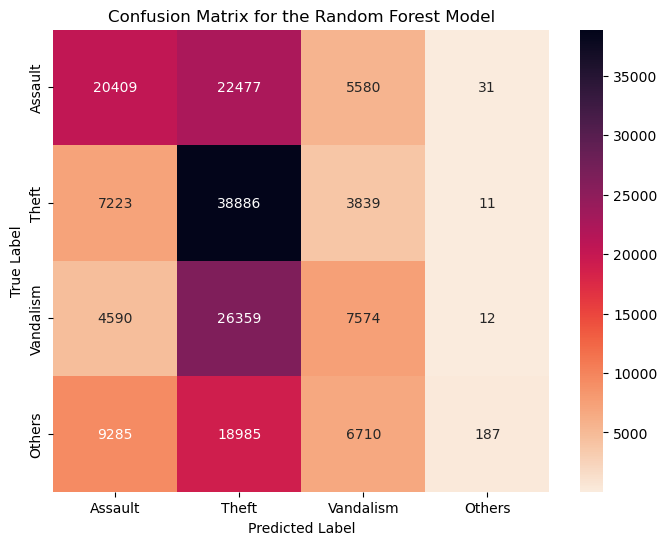

In [63]:
# Generate the confusion matrix
conf_mat = confusion_matrix(y_test, y_pred_rf)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, cmap="rocket_r", annot=True, fmt="d", xticklabels=['Assault','Theft','Vandalism','Others'],
            yticklabels=['Assault','Theft','Vandalism','Others'])
plt.title("Confusion Matrix for the Random Forest Model")
plt.ylabel("True Label")
plt.xlabel("Predicted Label");
#plt.savefig('confusion_matrix.png')

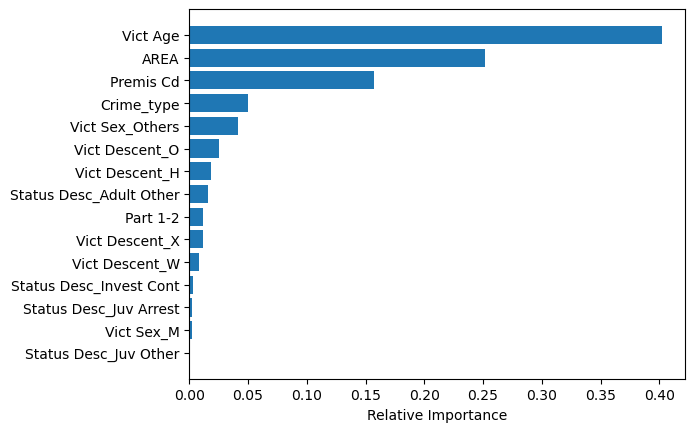

In [62]:
# Get feature importances
importances = rf.feature_importances_
indices = range(len(importances))
 
# Rearrange feature names so they match the sorted feature importances
names = [combined_data_model.columns[i] for i in importances.argsort()]
 
# Plot Feature Importance
plt.figure()
#plt.title(&quot;Feature Importance with Random Forest Regressor&quot;)
plt.barh(indices, sorted(importances), align='center')
plt.yticks(indices, names)
plt.xlabel('Relative Importance')
plt.show()

In [351]:
y_train.value_counts()

0    73428
1      776
Name: CrimeType, dtype: int64

In [55]:
import lightgbm as lgb

In [56]:
model = lgb.LGBMClassifier(learning_rate=0.09,max_depth=-5,random_state=42)
model.fit(X_train,y_train,eval_set=[(X_test,y_test),(X_train,y_train)],
          verbose=20,eval_metric='logloss')

[20]	training's multi_logloss: 1.07384	valid_0's multi_logloss: 1.0735
[40]	training's multi_logloss: 1.03624	valid_0's multi_logloss: 1.03719
[60]	training's multi_logloss: 1.02249	valid_0's multi_logloss: 1.02476
[80]	training's multi_logloss: 1.01468	valid_0's multi_logloss: 1.01829
[100]	training's multi_logloss: 1.00904	valid_0's multi_logloss: 1.01385


LGBMClassifier(learning_rate=0.09, max_depth=-5, random_state=42)

In [57]:
print('Training accuracy {:.4f}'.format(model.score(X_train,y_train)))
print('Testing accuracy {:.4f}'.format(model.score(X_test,y_test)))

Training accuracy 0.5510
Testing accuracy 0.5481


In [65]:
params = {
    'objective': 'multiclass',
    'num_class': 4,
    'metric': 'multi_logloss',
    'verbose': 0
}

In [66]:
X_train, X_val,y_train, y_val = train_test_split(x,y,
                                      random_state=2023,
                                      test_size=0.30)
# Check the shape of both sets
X_train.shape, X_val.shape

((401702, 15), (172158, 15))

In [67]:
# Create a LightGBM dataset
train_data = lgb.Dataset(X_train, label=y_train)
valid_data = lgb.Dataset(X_val, label=y_val, reference=train_data)

In [68]:
# Training the Model
num_round = 150
evals={}
model = lgb.train(params,
                  train_data,
                  num_round,
                  early_stopping_rounds=10,
                  valid_sets=[valid_data],
                 callbacks = [lgb.record_evaluation(evals)])

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.031811 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines


In [69]:
# Getting the model predictions
y_pred = model.predict(X_val,num_iteration=model.best_iteration)
y_pred.shape
y_pred[:3]

array([[0.07847695, 0.52169901, 0.19222014, 0.20760391],
       [0.65023789, 0.01902911, 0.06589409, 0.26483891],
       [0.1847466 , 0.34956303, 0.1657935 , 0.29989687]])

In [70]:
# Mapping probabilities to find the class
y_pred = np.argmax(y_pred, axis=1)
y_pred[:10]

array([1, 0, 1, 1, 3, 0, 1, 0, 1, 2], dtype=int64)

In [71]:
# Get the accuracy score for the prediction values
accuracy = accuracy_score(y_val, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.5513191370717596


In [72]:
print('Light XGBoost Model Classification Report \n -----------------------------')
accuracy = accuracy_score(y_val, y_pred)
print("Accuracy: {:.2f}".format(accuracy))
print(classification_report(y_val, y_pred,
                            target_names=['Assault','Theft','Vandalism','Others']))

Light XGBoost Model Classification Report 
 -----------------------------
Accuracy: 0.55
              precision    recall  f1-score   support

     Assault       0.56      0.69      0.62     48563
       Theft       0.53      0.75      0.62     49804
   Vandalism       0.61      0.48      0.54     38468
      Others       0.50      0.16      0.24     35323

    accuracy                           0.55    172158
   macro avg       0.55      0.52      0.50    172158
weighted avg       0.55      0.55      0.52    172158



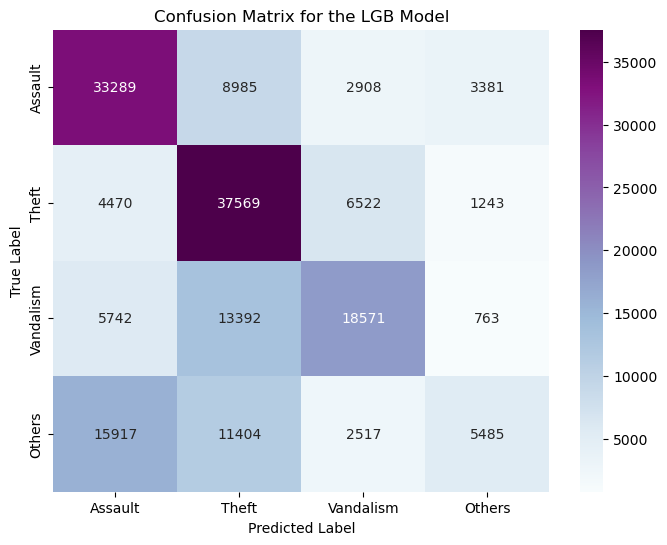

In [ ]:
# Generate the confusion matrix
conf_mat = confusion_matrix(y_val, y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, cmap="BuPu", annot=True, fmt="d", xticklabels=['Assault','Theft','Vandalism','Others'],
            yticklabels=['Assault','Theft','Vandalism','Others'])
plt.title("Confusion Matrix for the LGB Model")
plt.ylabel("True Label")
plt.xlabel("Predicted Label");

In [75]:
combined_data_model.head()

,AREA,Part 1-2,Vict Age,Premis Cd,Crime_type,Vict Sex_M,Vict Sex_Others,Vict Descent_H,Vict Descent_O,Vict Descent_W,Vict Descent_X,Status Desc_Adult Other,Status Desc_Invest Cont,Status Desc_Juv Arrest,Status Desc_Juv Other,Status Desc_UNK
0,-1.258109,1.013930,-0.225470,0.773324,0,0,0,0,0,0,0,1,0,0,0,0
1,-1.584785,1.013930,-0.932314,-1.072855,0,1,0,1,0,0,0,0,1,0,0,0
3,0.701945,1.013930,2.344873,0.777951,2,0,0,0,0,1,0,0,1,0,0,0
4,1.355297,1.013930,-0.546763,0.347639,2,0,1,0,0,0,1,0,1,0,0,0
5,-1.584785,-0.986262,-0.932314,1.856046,3,0,0,1,0,0,0,0,1,0,0,0


In [79]:
combined_data_model['Crime_type'] = combined_data_model['Crime_type'].astype('int')

In [81]:
combined_data_model.columns

Index(['AREA', 'Part 1-2', 'Vict Age', 'Premis Cd', 'Crime_type', 'Vict Sex_M',
       'Vict Sex_Others', 'Vict Descent_H', 'Vict Descent_O', 'Vict Descent_W',
       'Vict Descent_X', 'Status Desc_Adult Other', 'Status Desc_Invest Cont',
       'Status Desc_Juv Arrest', 'Status Desc_Juv Other', 'Status Desc_UNK'],
      dtype='object')

In [82]:
combined_data_model = combined_data_model[['Crime_type','AREA', 'Part 1-2', 'Vict Age', 'Premis Cd', 'Vict Sex_M',
       'Vict Sex_Others', 'Vict Descent_H', 'Vict Descent_O', 'Vict Descent_W',
       'Vict Descent_X', 'Status Desc_Adult Other', 'Status Desc_Invest Cont',
       'Status Desc_Juv Arrest', 'Status Desc_Juv Other', 'Status Desc_UNK']]

In [83]:
combined_data_model.head()

,Crime_type,AREA,Part 1-2,Vict Age,Premis Cd,Vict Sex_M,Vict Sex_Others,Vict Descent_H,Vict Descent_O,Vict Descent_W,Vict Descent_X,Status Desc_Adult Other,Status Desc_Invest Cont,Status Desc_Juv Arrest,Status Desc_Juv Other,Status Desc_UNK
0,0,-1.258109,1.013930,-0.225470,0.773324,0,0,0,0,0,0,1,0,0,0,0
1,0,-1.584785,1.013930,-0.932314,-1.072855,1,0,1,0,0,0,0,1,0,0,0
3,2,0.701945,1.013930,2.344873,0.777951,0,0,0,0,1,0,0,1,0,0,0
4,2,1.355297,1.013930,-0.546763,0.347639,0,1,0,0,0,1,0,1,0,0,0
5,3,-1.584785,-0.986262,-0.932314,1.856046,0,0,1,0,0,0,0,1,0,0,0


In [84]:
combined_data_model.to_csv('crime2.csv', header=False, index=False)

In [85]:
# load the data as an array instead of a data frame
from numpy import genfromtxt
crime_array = genfromtxt('crime2.csv', delimiter=',')

In [87]:
# split data into train and test portions and model
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split([item[1:] for item in crime_array], 
                                                 [item[0] for item in crime_array], 
                                                 test_size=0.5, 
                                                 random_state=42)

In [93]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [95]:
k_pred = knn.predict(X_test)

In [97]:
# Get the accuracy score for the prediction values
accuracy = accuracy_score(y_test, k_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.45983689401596206


In [114]:
import xgboost as xgb
xgb_clf = xgb.XGBClassifier(objective='multi:softmax', 
                            num_class=4,  
                            #early_stopping_rounds=10, 
                            eval_metric=['merror','mlogloss'], 
                            seed=42)
xgb_clf.fit(X_train, 
            y_train)

            # verbose=0, # set to 1 to see xgb training round intermediate results
            # eval_set=[(X_train, y_train), (X_test, y_test)])

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=['merror', 'mlogloss'],
              feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_class=4, num_parallel_tree=None, objective='multi:softmax', ...)

In [115]:
y_pred = xgb_clf.predict(X_test)

In [116]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.56      0.68      0.61     81102
         1.0       0.53      0.75      0.62     82830
         2.0       0.60      0.49      0.54     64141
         3.0       0.49      0.17      0.25     58857

    accuracy                           0.55    286930
   macro avg       0.55      0.52      0.51    286930
weighted avg       0.55      0.55      0.53    286930



In [123]:
prediction = y_pred
y_probabilities_test = xgb_clf.predict_proba(X_test)
y_prob_success = y_probabilities_test[:, 1]
#print("final features",final_features)
print("prediction:",prediction)
output = round(prediction[0], 2)
y_prob=round(y_prob_success[0], 3)
print(output)
print(y_prob)

prediction: [1 0 0 ... 3 0 1]
1
0.562


In [107]:
combined_data_model.columns

Index(['Crime_type', 'AREA', 'Part 1-2', 'Vict Age', 'Premis Cd', 'Vict Sex_M',
       'Vict Sex_Others', 'Vict Descent_H', 'Vict Descent_O', 'Vict Descent_W',
       'Vict Descent_X', 'Status Desc_Adult Other', 'Status Desc_Invest Cont',
       'Status Desc_Juv Arrest', 'Status Desc_Juv Other', 'Status Desc_UNK'],
      dtype='object')

In [112]:
df['Status Desc'].unique()

array(['Adult Other', 'Invest Cont', 'Adult Arrest', 'Juv Arrest',
       'Juv Other', 'UNK'], dtype=object)

In [125]:
df['Part 1-2'].value_counts()

1    470299
2    332657
Name: Part 1-2, dtype: int64

In [133]:
df['Vict Age'].min()

2.0

In [134]:
prediction_proba = xgb_clf.predict_proba(X_test)
prediction_proba = np.round(prediction_proba[0][1] * 100,2)
prediction_actual = xgb_clf.predict(X_test)
       

In [137]:
prediction_actual

array([1, 0, 0, ..., 3, 0, 1])